## 0. IMPORT

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import unidecode
import re
import string
import matplotlib.ticker as mtick
import os

In [2]:
#Usefull link
#https://github.com/carlosfab/sigmoidal_ai/blob/master/Como_Criar_uma_WordCloud_em_Python.ipynb

In [3]:
df_raw = pd.read_csv('rap.csv')
df_raw.head(4)

,song,artist,lyrics
0,Deixe o Som Reviver,3030,"Pra ascender e envolver toda gente,Deixa o som..."
1,Lovesong (part. Shan Luango),Baco Exu do Blues,"[Baco],Sou um urso psicopata,Pele preta cheia ..."
2,Mensagem Pra Eternidade (Versão Hip Hop Machine),3030,"[Bruno Chelles],A minha voz ecoa pela eternida..."
3,"Lágrima (part. Gloria Groove, Baco Exu do Blue...",Baco Exu do Blues,"Eu só de te ver (caiu uma lágrima),Vou confess..."


## 1. Data Cleaning

In [4]:
print(df_raw[df_raw['lyrics'].isna() == True])

            song   artist lyrics
1997    Silêncio  Emicida    NaN
5583  Lembranças     Sant    NaN


In [5]:
df_valid = df_raw.dropna()
print(df_valid.isna().sum())

song      0
artist    0
lyrics    0
dtype: int64


In [6]:
def cleaning_text(text):
    
    regex = re.compile('[%s]' % re.escape(string.punctuation.replace('\'','')))
    text = text.lower().replace('’', '')
    text = unidecode.unidecode(text) 
    text = re.sub('\[(.+?)\]', '', text) #excluir palavras entre []
    text = re.sub('\((.+?)\)', '', text) #excluir palavras entre ()
    text = re.sub(regex, ' ', text) #excluir pontuação
    text = re.sub('\s+',' ', text).strip() #substituir espaços maiores que 1 por 1.
    
    return text

In [7]:
#3.7seg
df = df_valid.groupby('artist')['lyrics'].agg(''.join).reset_index()
df['lyrics_clean'] = df['lyrics'].apply(lambda x: cleaning_text(x))
df.head(3)

,artist,lyrics,lyrics_clean
0,1Kilo,"[Chris],Ei!,Para de me olhar como se eu te dev...",ei para de me olhar como se eu te devesse algo...
1,3030,"Pra ascender e envolver toda gente,Deixa o som...",pra ascender e envolver toda gente deixa o som...
2,ADL MC's,"eu to juntando dinheiro, por isso,ando a pé me...",eu to juntando dinheiro por isso ando a pe mes...


## 2. Data Processing

### 2.1. Tokenizing

In [8]:
df["tokens"] = df.lyrics_clean.str.split()

df.set_index('artist', inplace = True)
df.head(3)

,lyrics,lyrics_clean,tokens
artist,,,
1Kilo,"[Chris],Ei!,Para de me olhar como se eu te dev...",ei para de me olhar como se eu te devesse algo...,"[ei, para, de, me, olhar, como, se, eu, te, de..."
3030,"Pra ascender e envolver toda gente,Deixa o som...",pra ascender e envolver toda gente deixa o som...,"[pra, ascender, e, envolver, toda, gente, deix..."
ADL MC's,"eu to juntando dinheiro, por isso,ando a pé me...",eu to juntando dinheiro por isso ando a pe mes...,"[eu, to, juntando, dinheiro, por, isso, ando, ..."


### 3.2. Filtering Stopwords

In [9]:
nltk.download('stopwords')
stopwords_nltk = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\breno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#3.37seg
update = ["tá",'pra','tô', 'cê','pro', 'então', "meu", "em", 
                   "você", "de", "ao", "os",'vou', 'vai', 'vem', 'mim', 
                   'uns', 'sei', 'quero', 'ser', 'ver', 'aqui','faz']
stopwords_raw = [*stopwords_nltk, *update]

stopwords = [unidecode.unidecode(word) for word in stopwords_raw]

def remove_stopwords(word_list):
    return ' '.join([word for word in word_list if word not in stopwords])

df['wordcloud'] = df['tokens'].apply(lambda x: remove_stopwords(x))
df.head(3)

,lyrics,lyrics_clean,tokens,wordcloud
artist,,,,
1Kilo,"[Chris],Ei!,Para de me olhar como se eu te dev...",ei para de me olhar como se eu te devesse algo...,"[ei, para, de, me, olhar, como, se, eu, te, de...",ei olhar devesse algo real tao devendo tipo ba...
3030,"Pra ascender e envolver toda gente,Deixa o som...",pra ascender e envolver toda gente deixa o som...,"[pra, ascender, e, envolver, toda, gente, deix...",ascender envolver toda gente deixa som reviver...
ADL MC's,"eu to juntando dinheiro, por isso,ando a pé me...",eu to juntando dinheiro por isso ando a pe mes...,"[eu, to, juntando, dinheiro, por, isso, ando, ...",juntando dinheiro ando pe ligo ando dia inteir...


### 3.3. Counting Words

In [18]:
df['Unique'] = df['tokens'].apply(lambda x: len(set(x)))
df['Total'] = df['tokens'].apply(lambda x: len(x))
df['Relative'] = df['tokens'].apply(lambda x: len(set(x))/len(x))
df.head(3)

,lyrics,lyrics_clean,tokens,wordcloud,tokens-not-stop,Unique,Total,Relative
artist,,,,,,,,
1Kilo,"[Chris],Ei!,Para de me olhar como se eu te dev...",ei para de me olhar como se eu te devesse algo...,"[ei, para, de, me, olhar, como, se, eu, te, de...",ei olhar devesse algo real tao devendo tipo ba...,"[ei, olhar, devesse, algo, real, tao, devendo,...",8068,84948,0.094976
3030,"Pra ascender e envolver toda gente,Deixa o som...",pra ascender e envolver toda gente deixa o som...,"[pra, ascender, e, envolver, toda, gente, deix...",ascender envolver toda gente deixa som reviver...,"[ascender, envolver, toda, gente, deixa, som, ...",6938,57760,0.120118
ADL MC's,"eu to juntando dinheiro, por isso,ando a pé me...",eu to juntando dinheiro por isso ando a pe mes...,"[eu, to, juntando, dinheiro, por, isso, ando, ...",juntando dinheiro ando pe ligo ando dia inteir...,"[juntando, dinheiro, ando, pe, ligo, ando, dia...",6914,42941,0.161012


## 3. Plotting

### 3.1. Wordcloud

In [11]:
#6:22min pra rodar 
path = os.getcwd()
wordcloud_folder = 'wordcloud'

for artist in df.index:
    wordcloud = WordCloud(background_color="black",
                          max_words = 500,
                          width=1600, height=800).generate(df.loc[artist]['wordcloud'])
    
    # mostrar a imagem final
#     fig, ax = plt.subplots(figsize=(10,6))
#     ax.imshow(wordcloud, interpolation='bilinear')
#     ax.set_axis_off()
#     plt.imshow(wordcloud);

    if not os.path.isdir(wordcloud_folder):
        os.mkdir(wordcloud_folder)
    
    else:
        wordcloud.to_file(os.path.join(path,wordcloud_folder,f"{artist}_wordcloud.png"))     

### 3.2. Scatterplot of Unique Words

In [16]:
from __future__ import division
import sys
from matplotlib import pyplot as plt
from itertools import product
import numpy as np
from operator import itemgetter
from matplotlib.path import get_path_collection_extents
import matplotlib


def get_bboxes_pathcollection(sc, ax):
    """Function to return a list of bounding boxes in display coordinates
    for a scatter plot
    Thank you to ImportanceOfBeingErnest
    https://stackoverflow.com/a/55007838/1304161"""
    #    ax.figure.canvas.draw() # need to draw before the transforms are set.
    transform = sc.get_transform()
    transOffset = sc.get_offset_transform()
    offsets = sc._offsets
    paths = sc.get_paths()
    transforms = sc.get_transforms()

    if not transform.is_affine:
        paths = [transform.transform_path_non_affine(p) for p in paths]
        transform = transform.get_affine()
    if not transOffset.is_affine:
        offsets = transOffset.transform_non_affine(offsets)
        transOffset = transOffset.get_affine()

    if isinstance(offsets, np.ma.MaskedArray):
        offsets = offsets.filled(np.nan)

    bboxes = []

    if len(paths) and len(offsets):
        if len(paths) < len(offsets):
            # for usual scatters you have one path, but several offsets
            paths = [paths[0]] * len(offsets)
        if len(transforms) < len(offsets):
            # often you may have a single scatter size, but several offsets
            transforms = [transforms[0]] * len(offsets)

        for p, o, t in zip(paths, offsets, transforms):
            result = get_path_collection_extents(
                transform.frozen(), [p], [t], [o], transOffset.frozen()
            )
            bboxes.append(result)

    return bboxes


def get_text_position(text):
    x, y = text.get_position()
    t_x, t_y = text.get_transform().transform((x, y))
    return (t_x, t_y)


def set_text_position(text, t_x, t_y):
    x, y = text.get_transform().inverted().transform((t_x, t_y))
    text.set_position((x, y))
    return None


def get_orig_coords(transform, t_x, t_y):
    x, y = transform.inverted().transform((t_x, t_y))
    return (x, y)


def get_bboxes(objs, r=None, expand=(1, 1), ax=None, transform=None):
    """
    
    Parameters
    ----------
    objs : list, or PathCollection
        List of objects to get bboxes from. Also works with mpl PathCollection.
    r : renderer
        Renderer. The default is None, then automatically deduced from ax.
    expand : (float, float), optional
        How much to expand bboxes in (x, y), in fractions. The default is (1, 1).
    ax : Axes, optional
        The default is None, then uses current axes.
    transform : optional
        Transform to apply to the objects, if they don't return they window extent.
        The default is None, then applies the default ax transform.
    Returns
    -------
    list
        List of bboxes.
    """
    ax = ax or plt.gca()
    r = r or get_renderer(ax.get_figure())
    try:
        return [i.get_window_extent(r).expanded(*expand) for i in objs]
    except (AttributeError, TypeError):
        try:
            if all([isinstance(obj, matplotlib.transforms.BboxBase) for obj in objs]):
                return objs
            else:
                raise ValueError("Something is wrong")
        except TypeError:
            return get_bboxes_pathcollection(objs, ax)


def get_midpoint(bbox):
    cx = (bbox.x0 + bbox.x1) / 2
    cy = (bbox.y0 + bbox.y1) / 2
    return cx, cy


def get_points_inside_bbox(x, y, bbox):
    """Return the indices of points inside the given bbox."""
    x1, y1, x2, y2 = bbox.xmin, bbox.ymin, bbox.xmax, bbox.ymax
    x_in = np.logical_and(x > x1, x < x2)
    y_in = np.logical_and(y > y1, y < y2)
    return np.asarray(np.where(x_in & y_in)[0])


def get_renderer(fig):
    try:
        return fig.canvas.get_renderer()
    except AttributeError:
        return fig.canvas.renderer


def overlap_bbox_and_point(bbox, xp, yp):
    """Given a bbox that contains a given point, return the (x, y) displacement
    necessary to make the bbox not overlap the point."""
    cx, cy = get_midpoint(bbox)

    dir_x = np.sign(cx - xp)
    dir_y = np.sign(cy - yp)

    if dir_x == -1:
        dx = xp - bbox.xmax
    elif dir_x == 1:
        dx = xp - bbox.xmin
    else:
        dx = 0

    if dir_y == -1:
        dy = yp - bbox.ymax
    elif dir_y == 1:
        dy = yp - bbox.ymin
    else:
        dy = 0
    return dx, dy


def move_texts(texts, delta_x, delta_y, bboxes=None, renderer=None, ax=None):
    ax = ax or plt.gca()
    if bboxes is None:
        r = renderer or get_renderer(ax.get_figure())
        bboxes = get_bboxes(texts, r, (1, 1), ax=ax)
    ax_bbox = ax.patch.get_extents()
    xmin = ax_bbox.xmin
    xmax = ax_bbox.xmax
    ymin = ax_bbox.ymin
    ymax = ax_bbox.ymax
    for i, (text, dx, dy) in enumerate(zip(texts, delta_x, delta_y)):
        bbox = bboxes[i]
        x1, y1, x2, y2 = bbox.xmin, bbox.ymin, bbox.xmax, bbox.ymax
        if x1 + dx < xmin:
            dx = 0
        if x2 + dx > xmax:
            dx = 0
        if y1 + dy < ymin:
            dy = 0
        if y2 + dy > ymax:
            dy = 0

        x, y = get_text_position(text)
        newx = x + dx
        newy = y + dy
        set_text_position(text, newx, newy)


def optimally_align_text(
    x,
    y,
    texts,
    expand=(1.0, 1.0),
    add_bboxes=[],
    renderer=None,
    ax=None,
    direction="xy",
):
    """
    For all text objects find alignment that causes the least overlap with
    points and other texts and apply it
    """
    ax = ax or plt.gca()
    r = renderer or get_renderer(ax.get_figure())
    ax_bbox = ax.patch.get_extents()
    xmin = ax_bbox.xmin
    xmax = ax_bbox.xmax
    ymin = ax_bbox.ymin
    ymax = ax_bbox.ymax
    bboxes = get_bboxes(texts, r, expand, ax=ax)
    if "x" not in direction:
        ha = [""]
    else:
        ha = ["left", "right", "center"]
    if "y" not in direction:
        va = [""]
    else:
        va = ["bottom", "top", "center"]
    alignment = list(product(ha, va))
    #    coords = np.array(zip(x, y))
    for i, text in enumerate(texts):
        #        tcoords = np.array(text.get_position()).T
        #        nonself_coords = coords[~np.all(coords==tcoords, axis=1)]
        #        nonself_x, nonself_y = np.split(nonself_coords, 2, axis=1)
        counts = []
        for h, v in alignment:
            if h:
                text.set_ha(h)
            if v:
                text.set_va(v)
            bbox = text.get_window_extent(r).expanded(*expand)
            c = len(get_points_inside_bbox(x, y, bbox))
            intersections = [
                bbox.intersection(bbox, bbox2) if i != j else None
                for j, bbox2 in enumerate(bboxes + add_bboxes)
            ]
            intersections = sum(
                [abs(b.width * b.height) if b is not None else 0 for b in intersections]
            )
            # Check for out-of-axes position
            bbox = text.get_window_extent(r)
            x1, y1, x2, y2 = bbox.xmin, bbox.ymin, bbox.xmax, bbox.ymax
            if x1 < xmin or x2 > xmax or y1 < ymin or y2 > ymax:
                axout = 1
            else:
                axout = 0
            counts.append((axout, c, intersections))
        # Most important: prefer alignments that keep the text inside the axes.
        # If tied, take the alignments that minimize the number of x, y points
        # contained inside the text.
        # Break any remaining ties by minimizing the total area of intersections
        # with all text bboxes and other objects to avoid.
        a, value = min(enumerate(counts), key=itemgetter(1))
        if "x" in direction:
            text.set_ha(alignment[a][0])
        if "y" in direction:
            text.set_va(alignment[a][1])
        bboxes[i] = text.get_window_extent(r).expanded(*expand)
    return texts


def repel_text(
    texts, renderer=None, ax=None, expand=(1.2, 1.2), only_use_max_min=False, move=False
):
    """
    Repel texts from each other while expanding their bounding boxes by expand
    (x, y), e.g. (1.2, 1.2) would multiply width and height by 1.2.
    Requires a renderer to get the actual sizes of the text, and to that end
    either one needs to be directly provided, or the axes have to be specified,
    and the renderer is then got from the axes object.
    """
    ax = ax or plt.gca()
    r = renderer or get_renderer(ax.get_figure())
    bboxes = get_bboxes(texts, r, expand, ax=ax)
    xmins = [bbox.xmin for bbox in bboxes]
    xmaxs = [bbox.xmax for bbox in bboxes]
    ymaxs = [bbox.ymax for bbox in bboxes]
    ymins = [bbox.ymin for bbox in bboxes]

    overlaps_x = np.zeros((len(bboxes), len(bboxes)))
    overlaps_y = np.zeros_like(overlaps_x)
    overlap_directions_x = np.zeros_like(overlaps_x)
    overlap_directions_y = np.zeros_like(overlaps_y)
    for i, bbox1 in enumerate(bboxes):
        overlaps = get_points_inside_bbox(
            xmins * 2 + xmaxs * 2, (ymins + ymaxs) * 2, bbox1
        ) % len(bboxes)
        overlaps = np.unique(overlaps)
        for j in overlaps:
            bbox2 = bboxes[j]
            x, y = bbox1.intersection(bbox1, bbox2).size
            overlaps_x[i, j] = x
            overlaps_y[i, j] = y
            direction = np.sign(bbox1.extents - bbox2.extents)[:2]
            overlap_directions_x[i, j] = direction[0]
            overlap_directions_y[i, j] = direction[1]

    move_x = overlaps_x * overlap_directions_x
    move_y = overlaps_y * overlap_directions_y

    delta_x = move_x.sum(axis=1)
    delta_y = move_y.sum(axis=1)

    q = np.sum(overlaps_x), np.sum(overlaps_y)
    if move:
        move_texts(texts, delta_x, delta_y, bboxes, ax=ax)
    return delta_x, delta_y, q


def repel_text_from_bboxes(
    add_bboxes,
    texts,
    renderer=None,
    ax=None,
    expand=(1.2, 1.2),
    only_use_max_min=False,
    move=False,
):
    """
    Repel texts from other objects' bboxes while expanding their (texts')
    bounding boxes by expand (x, y), e.g. (1.2, 1.2) would multiply width and
    height by 1.2.
    Requires a renderer to get the actual sizes of the text, and to that end
    either one needs to be directly provided, or the axes have to be specified,
    and the renderer is then got from the axes object.
    """
    ax = ax or plt.gca()
    r = renderer or get_renderer(ax.get_figure())

    bboxes = get_bboxes(texts, r, expand, ax=ax)

    overlaps_x = np.zeros((len(bboxes), len(add_bboxes)))
    overlaps_y = np.zeros_like(overlaps_x)
    overlap_directions_x = np.zeros_like(overlaps_x)
    overlap_directions_y = np.zeros_like(overlaps_y)

    for i, bbox1 in enumerate(bboxes):
        for j, bbox2 in enumerate(add_bboxes):
            try:
                x, y = bbox1.intersection(bbox1, bbox2).size
                direction = np.sign(bbox1.extents - bbox2.extents)[:2]
                overlaps_x[i, j] = x
                overlaps_y[i, j] = y
                overlap_directions_x[i, j] = direction[0]
                overlap_directions_y[i, j] = direction[1]
            except AttributeError:
                pass

    move_x = overlaps_x * overlap_directions_x
    move_y = overlaps_y * overlap_directions_y

    delta_x = move_x.sum(axis=1)
    delta_y = move_y.sum(axis=1)

    q = np.sum(overlaps_x), np.sum(overlaps_y)
    if move:
        move_texts(texts, delta_x, delta_y, bboxes, ax=ax)
    return delta_x, delta_y, q


def repel_text_from_points(
    x, y, texts, renderer=None, ax=None, expand=(1.2, 1.2), move=False
):
    """
    Repel texts from all points specified by x and y while expanding their
    (texts'!) bounding boxes by expandby  (x, y), e.g. (1.2, 1.2)
    would multiply both width and height by 1.2.
    Requires a renderer to get the actual sizes of the text, and to that end
    either one needs to be directly provided, or the axes have to be specified,
    and the renderer is then got from the axes object.
    """
    assert len(x) == len(y)
    ax = ax or plt.gca()
    r = renderer or get_renderer(ax.get_figure())
    bboxes = get_bboxes(texts, r, expand, ax=ax)

    # move_x[i,j] is the x displacement of the i'th text caused by the j'th point
    move_x = np.zeros((len(bboxes), len(x)))
    move_y = np.zeros((len(bboxes), len(x)))
    for i, bbox in enumerate(bboxes):
        xy_in = get_points_inside_bbox(x, y, bbox)
        for j in xy_in:
            xp, yp = x[j], y[j]
            dx, dy = overlap_bbox_and_point(bbox, xp, yp)

            move_x[i, j] = dx
            move_y[i, j] = dy

    delta_x = move_x.sum(axis=1)
    delta_y = move_y.sum(axis=1)
    q = np.sum(np.abs(move_x)), np.sum(np.abs(move_y))
    if move:
        move_texts(texts, delta_x, delta_y, bboxes, ax=ax)
    return delta_x, delta_y, q


def repel_text_from_axes(texts, ax=None, bboxes=None, renderer=None, expand=None):
    ax = ax or plt.gca()
    r = renderer or get_renderer(ax.get_figure())
    if expand is None:
        expand = (1, 1)
    if bboxes is None:
        bboxes = get_bboxes(texts, r, expand=expand, ax=ax)
    ax_bbox = ax.patch.get_extents()
    xmin = ax_bbox.xmin
    xmax = ax_bbox.xmax
    ymin = ax_bbox.ymin
    ymax = ax_bbox.ymax
    for i, bbox in enumerate(bboxes):
        x1, y1, x2, y2 = bbox.xmin, bbox.ymin, bbox.xmax, bbox.ymax
        dx, dy = 0, 0
        if x1 < xmin:
            dx = xmin - x1
        if x2 > xmax:
            dx = xmax - x2
        if y1 < ymin:
            dy = ymin - y1
        if y2 > ymax:
            dy = ymax - y2
        if dx or dy:
            x, y = get_text_position(texts[i])
            newx, newy = x + dx, y + dy
            set_text_position(texts[i], newx, newy)
    return texts


def float_to_tuple(a):
    try:
        a = float(a)
        return (a, a)
    except TypeError:
        assert len(a) == 2
        try:
            b = float(a[0]), float(a[1])
        except TypeError:
            raise TypeError("Force values must be castable to floats")
        return b


def adjust_text(
    texts,
    x=None,
    y=None,
    add_objects=None,
    ax=None,
    expand_text=(1.05, 1.2),
    expand_points=(1.05, 1.2),
    expand_objects=(1.05, 1.2),
    expand_align=(1.05, 1.2),
    autoalign="xy",
    va="center",
    ha="center",
    force_text=(0.1, 0.25),
    force_points=(0.2, 0.5),
    force_objects=(0.1, 0.25),
    lim=500,
    precision=0.01,
    only_move={"points": "xy", "text": "xy", "objects": "xy"},
    avoid_text=True,
    avoid_points=True,
    avoid_self=True,
    save_steps=False,
    save_prefix="",
    save_format="png",
    add_step_numbers=True,
    *args,
    **kwargs
):
    """Iteratively adjusts the locations of texts.
    Call adjust_text the very last, after all plotting (especially
    anything that can change the axes limits) has been done. This is
    because to move texts the function needs to use the dimensions of
    the axes, and without knowing the final size of the plots the
    results will be completely nonsensical, or suboptimal.
    First moves all texts that are outside the axes limits
    inside. Then in each iteration moves all texts away from each
    other and from points. In the end hides texts and substitutes them
    with annotations to link them to the respective points.
    Parameters
    ----------
    texts : list
        A list of :obj:`matplotlib.text.Text` objects to adjust.
    Other Parameters
    ----------------
    x : array_like
        x-coordinates of points to repel from; if not provided only uses text
        coordinates.
    y : array_like
        y-coordinates of points to repel from; if not provided only uses text
        coordinates
    add_objects : list or PathCollection
        a list of additional matplotlib objects to avoid; they must have a
        `.get_window_extent()` method; alternatively, a PathCollection or a
        list of Bbox objects.
    ax : matplotlib axe, default is current axe (plt.gca())
        axe object with the plot
    expand_text : array_like, default (1.05, 1.2)
        a tuple/list/... with 2 multipliers (x, y) by which to expand the
        bounding box of texts when repelling them from each other.
    expand_points : array_like, default (1.05, 1.2)
        a tuple/list/... with 2 multipliers (x, y) by which to expand the
        bounding box of texts when repelling them from points.
    expand_objects : array_like, default (1.05, 1.2)
        a tuple/list/... with 2 multipliers (x, y) by which to expand the
        bounding box of texts when repelling them from other objects.
    expand_align : array_like, default (1.05, 1.2)
        a tuple/list/... with 2 multipliers (x, y) by which to expand the
        bounding box of texts when autoaligning texts.
    autoalign: str or boolean {'xy', 'x', 'y', True, False}, default 'xy'
        Direction in wich the best alignement will be determined
        - 'xy' or True, best alignment of all texts determined in all
          directions automatically before running the iterative adjustment
          (overriding va and ha),
        - 'x', will only align horizontally,
        - 'y', will only align vertically,
        - False, do nothing (i.e. preserve va and ha)
    va : str, default 'center'
        vertical alignment of texts
    ha : str, default 'center'
        horizontal alignment of texts,
    force_text : tuple, default (0.1, 0.25)
        the repel force from texts is multiplied by this value
    force_points : tuple, default (0.2, 0.5)
        the repel force from points is multiplied by this value
    force_objects : float, default (0.1, 0.25)
        same as other forces, but for repelling additional objects
    lim : int, default 500
        limit of number of iterations
    precision : float, default 0.01
        iterate until the sum of all overlaps along both x and y are less than
        this amount, as a fraction of the total widths and heights,
        respectively. May need to increase for complicated situations.
    only_move : dict, default {'points':'xy', 'text':'xy', 'objects':'xy'}
        a dict to restrict movement of texts to only certain axes for certain
        types of overlaps.
        Valid keys are 'points', 'text', and 'objects'.
        Valid values are '', 'x', 'y', and 'xy'.
        For example, only_move={'points':'y', 'text':'xy', 'objects':'xy'}
        forbids moving texts along the x axis due to overlaps with points.
    avoid_text : bool, default True
        whether to repel texts from each other.
    avoid_points : bool, default True
        whether to repel texts from points. Can be helpful to switch off in
        extremely crowded plots.
    avoid_self : bool, default True
        whether to repel texts from its original positions.
    save_steps : bool, default False
        whether to save intermediate steps as images.
    save_prefix : str, default ''
        if `save_steps` is True, a path and/or prefix to the saved steps.
    save_format : str, default 'png'
        if `save_steps` is True, a format to save the steps into.
    add_step_numbers : bool, default True
        if `save_steps` is True, whether to add step numbers as titles to the
        images of saving steps.
    args and kwargs :
        any arguments will be fed into obj:`ax.annotate` after all the
        optimization is done just for plotting the connecting arrows if
        required.
    Return
    ------
    int
        Number of iteration
    """
    plt.draw()
    ax = ax or plt.gca()
    r = get_renderer(ax.get_figure())
    transform = texts[0].get_transform()
    if (x is not None) & (y is not None):
        for ix, tupxy in enumerate(zip(x, y)):
            t_x, t_y = transform.transform(tupxy)
            x[ix] = t_x
            y[ix] = t_y
    orig_xy = [get_text_position(text) for text in texts]
    orig_x = [xy[0] for xy in orig_xy]
    orig_y = [xy[1] for xy in orig_xy]
    force_objects = float_to_tuple(force_objects)
    force_text = float_to_tuple(force_text)
    force_points = float_to_tuple(force_points)

    #    xdiff = np.diff(ax.get_xlim())[0]
    #    ydiff = np.diff(ax.get_ylim())[0]

    bboxes = get_bboxes(texts, r, (1.0, 1.0), ax)
    sum_width = np.sum(list(map(lambda bbox: bbox.width, bboxes)))
    sum_height = np.sum(list(map(lambda bbox: bbox.height, bboxes)))
    if not any(list(map(lambda val: "x" in val, only_move.values()))):
        precision_x = np.inf
    else:
        precision_x = precision * sum_width
    #
    if not any(list(map(lambda val: "y" in val, only_move.values()))):
        precision_y = np.inf
    else:
        precision_y = precision * sum_height

    if x is None:
        if y is None:
            if avoid_self:
                x, y = orig_x, orig_y
            else:
                x, y = [], []
        else:
            raise ValueError("Please specify both x and y, or neither")
    if y is None:
        raise ValueError("Please specify both x and y, or neither")
    if add_objects is None:
        text_from_objects = False
        add_bboxes = []
    else:
        try:
            add_bboxes = get_bboxes(add_objects, r, (1, 1), ax)
        except:
            raise ValueError(
                "Can't get bounding boxes from add_objects - is'\
                             it a flat list of matplotlib objects?"
            )
            return
        text_from_objects = True
    for text in texts:
        text.set_va(va)
        text.set_ha(ha)
    if save_steps:
        if add_step_numbers:
            plt.title("Before")
        plt.savefig(
            "%s%s.%s" % (save_prefix, "000a", save_format), format=save_format, dpi=150
        )

    if autoalign:
        if autoalign is True:
            autoalign = "xy"
        for i in range(2):
            texts = optimally_align_text(
                x,
                y,
                texts,
                expand=expand_align,
                add_bboxes=add_bboxes,
                direction=autoalign,
                renderer=r,
                ax=ax,
            )

    if save_steps:
        if add_step_numbers:
            plt.title("Autoaligned")
        plt.savefig(
            "%s%s.%s" % (save_prefix, "000b", save_format), format=save_format, dpi=150
        )

    texts = repel_text_from_axes(texts, ax, renderer=r, expand=expand_points)
    history = [(np.inf, np.inf)] * 10
    for i in range(lim):
        #        q1, q2 = [np.inf, np.inf], [np.inf, np.inf]

        if avoid_text:
            d_x_text, d_y_text, q1 = repel_text(
                texts, renderer=r, ax=ax, expand=expand_text
            )
        else:
            d_x_text, d_y_text, q1 = [0] * len(texts), [0] * len(texts), (0, 0)

        if avoid_points:
            d_x_points, d_y_points, q2 = repel_text_from_points(
                x, y, texts, ax=ax, renderer=r, expand=expand_points
            )
        else:
            d_x_points, d_y_points, q2 = [0] * len(texts), [0] * len(texts), (0, 0)

        if text_from_objects:
            d_x_objects, d_y_objects, q3 = repel_text_from_bboxes(
                add_bboxes, texts, ax=ax, renderer=r, expand=expand_objects
            )
        else:
            d_x_objects, d_y_objects, q3 = [0] * len(texts), [0] * len(texts), (0, 0)

        if only_move:
            if "text" in only_move:
                if "x" not in only_move["text"]:
                    d_x_text = np.zeros_like(d_x_text)
                if "y" not in only_move["text"]:
                    d_y_text = np.zeros_like(d_y_text)
            if "points" in only_move:
                if "x" not in only_move["points"]:
                    d_x_points = np.zeros_like(d_x_points)
                if "y" not in only_move["points"]:
                    d_y_points = np.zeros_like(d_y_points)
            if "objects" in only_move:
                if "x" not in only_move["objects"]:
                    d_x_objects = np.zeros_like(d_x_objects)
                if "y" not in only_move["objects"]:
                    d_y_objects = np.zeros_like(d_y_objects)

        dx = (
            np.array(d_x_text) * force_text[0]
            + np.array(d_x_points) * force_points[0]
            + np.array(d_x_objects) * force_objects[0]
        )
        dy = (
            np.array(d_y_text) * force_text[1]
            + np.array(d_y_points) * force_points[1]
            + np.array(d_y_objects) * force_objects[1]
        )
        qx = np.sum([q[0] for q in [q1, q2, q3]])
        qy = np.sum([q[1] for q in [q1, q2, q3]])
        histm = np.max(np.array(history), axis=0)
        history.pop(0)
        history.append((qx, qy))
        move_texts(texts, dx, dy, bboxes=get_bboxes(texts, r, (1, 1), ax), ax=ax)
        if save_steps:
            if add_step_numbers:
                plt.title(i + 1)
            plt.savefig(
                "%s%s.%s" % (save_prefix, "{0:03}".format(i + 1), save_format),
                format=save_format,
                dpi=150,
            )
        # Stop if we've reached the precision threshold, or if the x and y displacement
        # are both greater than the max over the last 10 iterations (suggesting a
        # failure to converge)
        if (qx < precision_x and qy < precision_y) or np.all([qx, qy] >= histm):
            break
        # Now adding arrows from texts to their original locations if required
    if "arrowprops" in kwargs:
        bboxes = get_bboxes(texts, r, (1, 1), ax)
        kwap = kwargs.pop("arrowprops")
        for j, (bbox, text) in enumerate(zip(bboxes, texts)):
            ap = {"patchA": text}  # Ensure arrow is clipped by the text
            ap.update(kwap)  # Add arrowprops from kwargs
            ax.annotate(
                "",  # Add an arrow from the text to the point
                xy=get_orig_coords(transform, orig_x[j], orig_y[j]),
                xytext=transform.inverted().transform(get_midpoint(bbox)),
                arrowprops=ap,
                xycoords=transform,
                textcoords=transform,
                *args,
                **kwargs
            )

    if save_steps:
        if add_step_numbers:
            plt.title(i + 1)
            plt.savefig(
                "%s%s.%s" % (save_prefix, "{0:03}".format(i + 1), save_format),
                format=save_format,
                dpi=150,
            )


            return i + 1

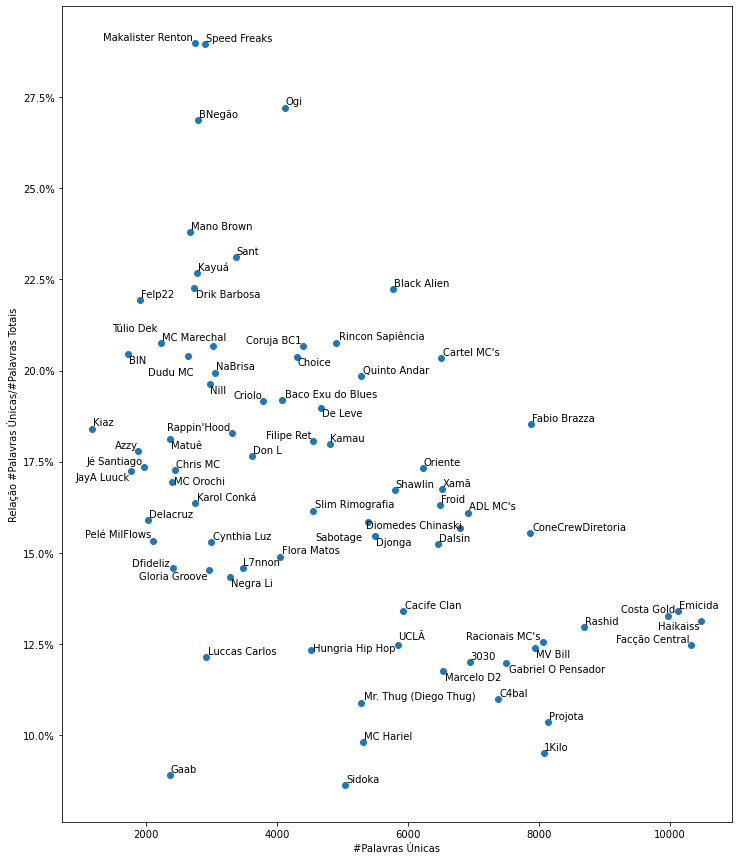

In [19]:
# https://github.com/Phlya/adjustText/blob/master/adjustText/__init__.py
# 1:07 min pra executar
x = df['Unique']
y = df['Relative']
annot = df.index

fig, ax = plt.subplots(figsize=(12, 15))
ax.scatter(x, y)

texts = []
for i, txt in enumerate(annot):
    texts.append(ax.text(x[i], y[i], txt))
adjust_text(texts)
plt.xlabel("#Palavras Únicas")
plt.ylabel("Relação #Palavras Únicas/#Palavras Totais")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()

## 4. Tests

In [19]:
df[df['Total']>35000]

,lyrics,lyrics_clean,tokens,wordcloud,Unique,Total,Relative
artist,,,,,,,
1Kilo,"[Chris],Ei!,Para de me olhar como se eu te dev...",ei para de me olhar como se eu te devesse algo...,"[ei, para, de, me, olhar, como, se, eu, te, de...",ei olhar devesse algo real tao devendo tipo ba...,8068,84948,0.094976
3030,"Pra ascender e envolver toda gente,Deixa o som...",pra ascender e envolver toda gente deixa o som...,"[pra, ascender, e, envolver, toda, gente, deix...",ascender envolver toda gente deixa som reviver...,6938,57760,0.120118
ADL MC's,"eu to juntando dinheiro, por isso,ando a pé me...",eu to juntando dinheiro por isso ando a pe mes...,"[eu, to, juntando, dinheiro, por, isso, ando, ...",juntando dinheiro ando pe ligo ando dia inteir...,6914,42941,0.161012
C4bal,"Ok ok, é o cabal no remix,Junto com o chris br...",ok ok e o cabal no remix junto com o chris bro...,"[ok, ok, e, o, cabal, no, remix, junto, com, o...",ok ok cabal remix junto chris brow olha oque f...,7376,67189,0.109780
Cacife Clan,"A noite comigo hoje é sua,Aproveite antes que ...",a noite comigo hoje e sua aproveite antes que ...,"[a, noite, comigo, hoje, e, sua, aproveite, an...",noite comigo hoje aproveite antes sol caia lua...,5923,44167,0.134105
ConeCrewDiretoria,"Você sabe como é (4x),Com o meu rap undergroun...",voce sabe como e com o meu rap underground se ...,"[voce, sabe, como, e, com, o, meu, rap, underg...",sabe rap underground necessario faco uniao som...,7859,50583,0.155368
Costa Gold,"Tanta miséria que vemos por aí,,Ensinam a valo...",tanta miseria que vemos por ai ensinam a valor...,"[tanta, miseria, que, vemos, por, ai, ensinam,...",tanta miseria vemos ai ensinam valorizar tudo ...,9959,75137,0.132545
Dalsin,"Eu era fogo perdido ela solução da chama,Eu mo...",eu era fogo perdido ela solucao da chama eu mo...,"[eu, era, fogo, perdido, ela, solucao, da, cha...",fogo perdido solucao chama mortal plano terra ...,6460,42404,0.152344
Diomedes Chinaski,"[Buneco],Quantos irmãos que eu já vi padecer n...",quantos irmaos que eu ja vi padecer na corrida...,"[quantos, irmaos, que, eu, ja, vi, padecer, na...",quantos irmaos vi padecer corrida maluca briga...,6794,43329,0.156800
